In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set a seed for reproducibility (optional but good for lab reports)
np.random.seed(42)

In [2]:
class StationaryBandit:
    def __init__(self, k=10):
        self.k = k
        # True values q*(a) are drawn from a normal distribution N(0,1)
        # These do NOT change over time (Stationary)
        self.q_star = np.random.normal(0, 1, k)
        
        # Identify the optimal action for performance tracking
        self.optimal_action = np.argmax(self.q_star)

    def get_reward(self, action):
        # Reward = q*(action) + noise
        noise = np.random.normal(0, 1)
        return self.q_star[action] + noise

In [3]:
def run_ucb_simulation(bandit, steps=1000, c=2):
    # Initialization
    k = bandit.k
    Q = np.zeros(k)      # Estimated values Q(a)
    N = np.zeros(k)      # Number of times arm 'a' was selected
    
    rewards = np.zeros(steps)
    optimal_counts = np.zeros(steps)
    
    # Loop over time steps t = 1 to 1000
    for t in range(1, steps + 1):
        
        # --- Step 1: Action Selection (UCB) ---
        if t <= k:
            # Initialization: Pull each arm at least once
            action = t - 1
        else:
            # Apply UCB Formula: Q(a) + c * sqrt(ln(t) / N(a))
            # np.log is natural log (ln)
            uncertainty = c * np.sqrt(np.log(t) / N[action])
            
            # Note: We compute this for ALL arms and pick the max
            ucb_values = Q + c * np.sqrt(np.log(t) / N)
            
            # Break ties randomly (standard NPTEL practice)
            action = np.random.choice(np.flatnonzero(ucb_values == ucb_values.max()))
        
        # --- Step 2: Get Reward from Environment ---
        reward = bandit.get_reward(action)
        
        # --- Step 3: Update Estimates (Incremental Sample Average) ---
        N[action] += 1
        # Q_new = Q_old + (1/n) * (Reward - Q_old)
        Q[action] += (1.0 / N[action]) * (reward - Q[action])
        
        # --- Recording Metrics ---
        rewards[t-1] = reward
        if action == bandit.optimal_action:
            optimal_counts[t-1] = 1
            
    return rewards, optimal_counts

In [4]:
# Simulation Parameters
runs = 2000
steps = 1000
c_param = 2  # Exploration parameter (standard value from book)

# Arrays to store average results
avg_rewards = np.zeros(steps)
avg_optimal_pct = np.zeros(steps)

print(f"Running {runs} independent simulations...")

for r in range(runs):
    # Create a new bandit problem for each run
    bandit = StationaryBandit(k=10)
    
    # Run UCB agent
    r_rewards, r_optimal = run_ucb_simulation(bandit, steps, c=c_param)
    
    # Accumulate results
    avg_rewards += r_rewards
    avg_optimal_pct += r_optimal

# Compute final averages
avg_rewards /= runs
avg_optimal_pct = (avg_optimal_pct / runs) * 100 # Convert to percentage

print("Simulation Complete.")

Running 2000 independent simulations...
Simulation Complete.


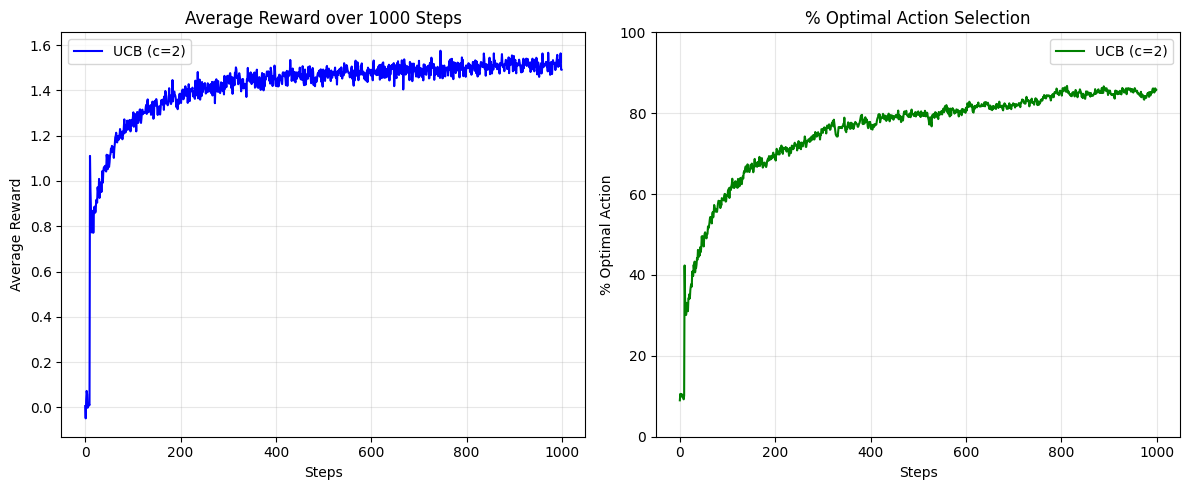

In [5]:
plt.figure(figsize=(12, 5))

# Plot 1: Average Reward
plt.subplot(1, 2, 1)
plt.plot(avg_rewards, label=f'UCB (c={c_param})', color='blue')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Average Reward over 1000 Steps')
plt.legend()
plt.grid(True, alpha=0.3)



# Plot 2: % Optimal Action
plt.subplot(1, 2, 2)
plt.plot(avg_optimal_pct, label=f'UCB (c={c_param})', color='green')
plt.xlabel('Steps')
plt.ylabel('% Optimal Action')
plt.title('% Optimal Action Selection')
plt.ylim(0, 100)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()